<a href="https://colab.research.google.com/github/Sandi-DeLaVega/Tensorflow-Practice/blob/main/Reinforcement_Learning__v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reinforcement Learning

### we let our model come up with its own examples by exploring an environment
 Humans learn by exploring and learning from mistakes and past experiences so let's have our computer do the same.

#Terminology

* Environment: 
  * In reinforcement learning tasks we have a notion of the enviornment. 
  * This is what our agent will explore. 
    * An example of an enviornment in the case of training an AI to play say a game of mario would be the level we are training the agent on.

* Agent:
  * an agent is an entity that is exploring the enviornment. 
  * Our agent will interact and take different actions within the enviornment.  
    * In our mario example the mario character within the game would be our agent.

* State:
  * always our agent will be in what we call a state. 
  * The state simply tells us about the status of the agent. 
  * The most common example of a state is the location of the agent within the enviornment. 
  * Moving locations would change the agents state.

* Action: 
  * any interaction between the agent and enviornment would be considered an action. 
    * For example, moving to the left or jumping would be an action. 
  * An action may or may not change the current state of the agent. 
    * In fact, the act of doing nothing is an action as well! 
    * The action of say not pressing a key if we are using our mario example.

Reward every action that our agent takes will result in a reward of some magnitude (positive or negative). 

### Goal of Agent: maximize its reward in an environment. 

### Important Part of Reinforcement Learning: determing how to reward the agent. 
After all, the goal of the agent is to maximize its rewards. This means we should reward the agent appropiatly such that it reaches the desired goal.

#Q-Learning

* a simple yet quite powerful technique in machine learning that involves learning a matrix of action-reward values.
* This matrix is often refered to as a Q-Table or Q-Matrix. 
* The matrix is in shape (number of possible states, number of possible actions) where each value at matrix[n, m] represents the agents expected reward given they are in state n and take action m. 

**The Q-learning algorithm defines the way we update the values in the matrix and decide what action to take at each state**. 

After a succesful training/learning of this Q-Table/matrix:
  * we can determine the action an agent should take in any state by looking at that states row in the matrix and taking the maximium value column as the action.

Consider this example.

Let's say A1-A4 are the possible actions and we have 3 states represented by each row (state 1 - state 3).

A1	A2	A3	A4
---
0	    0	    10	 5
---
5	    10	  0	   0
---
10	  5	    0	   0
---


If that was our Q-Table/matrix then the following would be the preffered actions in each state.

State 1: A3
State 2: A2
State 3: A1


#Learning the Q-Table

use the agent has yet to learn anything about the enviornment.

Our agent learns by exploring the enviornment and observing the outcome/reward from each action it takes in each state. But how does it know what action to take in each state? There are two ways that our agent can decide on which action to take.

1.  Randomly picking a valid action
2.  Using the current Q-Table to find the best action.

Near the beginning of our agents learning it will mostly take random actions in order to explore the enviornment and enter many different states. As it starts to explore more of the enviornment it will start to gradually rely more on it's learned values (Q-Table) to take actions. This means that as our agent explores more of the enviornment it will develop a better understanding and start to take "correct" or better actions more often. It's important that the agent has a good balance of taking random actions and using learned values to ensure it does get trapped in a local maximum.

After each new action our agent wil record the new state (if any) that it has entered and the reward that it recieved from taking that action. These values will be used to update the Q-Table. The agent will stop taking new actions only once a certain time limit is reached or it has acheived the goal or reached the end of the enviornment.

Updating Q-Values
The formula for updating the Q-Table after each action is as follows:

Q[state,action] = Q[state,action] + α∗(reward + γ∗max(Q[newState,:]) − Q[state,action]) 

α = stands for the Learning Rate
γ = stands for the Discount Factor

* Learning Rate  α 
The learning rate  α  is a numeric constant that defines how much change is permitted on each QTable update. 
A high learning rate means that each update will introduce a large change to the current state-action value. 
A small learning rate means that each update has a more subtle change. Modifying the learning rate will change how the agent explores the enviornment and how quickly it determines the final values in the QTable.

* Discount Factor  γ 
Discount factor also know as gamma ( γ ) is used to balance how much focus is put on the current and future reward. 
A high discount factor means that future rewards will be considered more heavily.


To perform updates on this table we will let the agent explpore the environment for a certain period of time and use each of its actions to make an update. Slowly we should start to notice the agent learning and choosing better actions.

Q-Learning Example: The Open AI Gym was developed so programmers could practice machine learning using unique environments.

In [5]:
import gym   # all you have to do to import and use open ai gym!

In [6]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment

In [7]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [8]:
env.reset()  # reset enviornment to default state

0

In [9]:
action = env.action_space.sample()  # get a random action 

In [10]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [11]:
env.render()   # render the GUI for the enviornment 

  (Up)
SFFF
FHFH
FFFH
HFFG


#Frozen Lake Enviornment

Now that we have a basic understanding of how the gym enviornment works it's time to discuss the specific problem we will be solving.

The environment we loaded above FrozenLake-v0 is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:

16 states (one for each square)
4 possible actions (LEFT, RIGHT, DOWN, UP)
4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

#Building the Q-Table
build an empty Q-Table that we can use to store and update our values

In [12]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [13]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#Constants
define some constants that will be used to update our Q-Table and tell our agent when to stop training

In [14]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

#Picking an Action
Remember that we can pick an action using one of two methods:

Randomly picking a valid action
Using the current Q-Table to find the best action.
Here we will define a new value  ϵ  that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the enviornment.

In [16]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

#Updating Q Values

Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])



#Putting it Together

In [18]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [19]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.66364086e-01 1.89112848e-02 1.51976170e-02 1.90837356e-02]
 [2.96879294e-03 1.78453995e-02 1.47873389e-02 2.14110972e-01]
 [4.95918626e-03 8.71540965e-03 1.61394295e-02 1.82081511e-01]
 [1.14799378e-02 3.48953777e-03 1.31378279e-02 1.41543655e-01]
 [5.45359672e-01 6.21910176e-03 9.13630599e-03 6.78586525e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.05606090e-05 4.08049635e-05 1.42244527e-01 1.26795831e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.72853406e-03 2.49405715e-03 3.01839777e-03 7.00022928e-01]
 [3.52693890e-03 7.97486409e-01 5.56386200e-03 4.06134808e-03]
 [8.59585642e-01 3.85977821e-04 9.45650475e-04 6.46958602e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.27689950e-03 8.92542182e-02 8.03877882e-01 7.79916365e-02]
 [1.16497943e-01 9.81660926e-01 5.16065432e-02 1.26126266e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

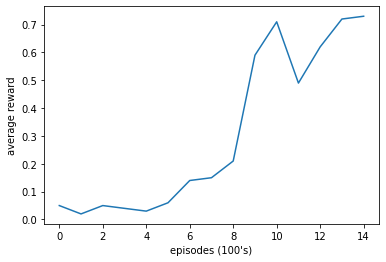

In [20]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()